In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  1
2.10.1


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

c:\Users\oscar\anaconda3\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\oscar\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1


* `os:` to handle file paths and directories
* `librosa:` to load audio and extract features
* `numpy:` for statistical operations (mean, variance)
* `pandas:` to store the data in table form and export to CSV
* `tqdm:` to show a nice progress bar in the console

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
def visualize_genre_grouped(genre_path_dict):
    for genre, path in genre_path_dict.items():
        print(f"\n Genre: {genre.upper()}")
        print("File:", path)
        
        # Load audio
        y, sr = librosa.load(path, sr=None)
        y, _ = librosa.effects.trim(y)

        #  Plot 1: Waveform 
        plt.figure(figsize=(10, 3))
        librosa.display.waveshow(y, sr=sr, alpha=0.4, color="green")
        plt.title(f"[{genre}] Waveform")
        plt.tight_layout()
        plt.show()

        #  Plot 2: STFT Spectrogram 
        stft = librosa.stft(y)
        stft_db = librosa.amplitude_to_db(np.abs(stft))

        plt.figure(figsize=(10, 3))
        librosa.display.specshow(stft_db, sr=sr, x_axis="time", y_axis="hz", cmap="cool")
        plt.colorbar(format="%+2.0f dB")
        plt.title(f"[{genre}] STFT Spectrogram")
        plt.tight_layout()
        plt.show()

        #  Plot 3: Mel Spectrogram 
        mel = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_db = librosa.amplitude_to_db(mel, ref=np.max)

        plt.figure(figsize=(10, 3))
        librosa.display.specshow(mel_db, sr=sr, x_axis="time", y_axis="log", cmap="magma")
        plt.colorbar(format="%+2.0f dB")
        plt.title(f"[{genre}] Mel Spectrogram")
        plt.tight_layout()
        plt.show()


In [13]:
import os

def get_first_audio_from_each_genre(base_dir, extension=".wav"):
    first_tracks = {}

    for genre in sorted(os.listdir(base_dir)):
        genre_path = os.path.join(base_dir, genre)
        if not os.path.isdir(genre_path):
            continue

        # List all .wav files in the genre folder
        files = [f for f in os.listdir(genre_path) if f.lower().endswith(extension)]
        if files:
            first_file = sorted(files)[0]  # pick the first in alphabetical order
            full_path = os.path.join(genre_path, first_file)
            first_tracks[genre] = full_path

    return first_tracks



 Genre: BLUES
File: C:\Users\oscar\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\genres_original\blues\blues.00000.wav


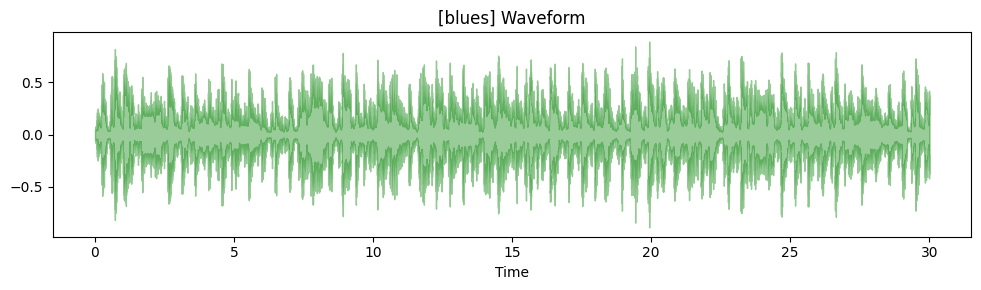

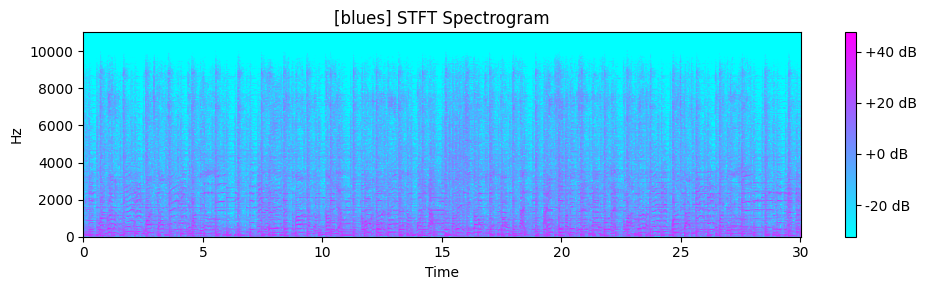

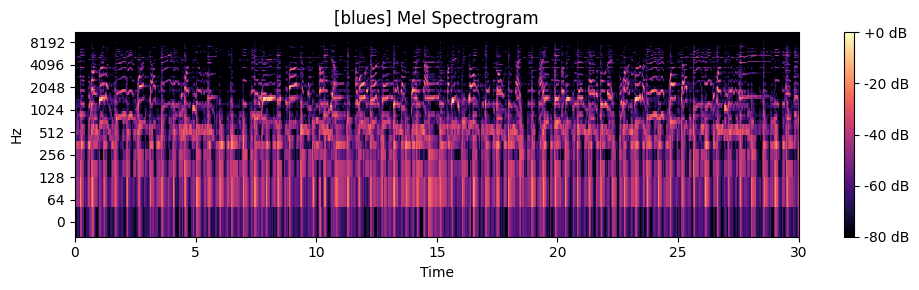


 Genre: CLASSICAL
File: C:\Users\oscar\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\genres_original\classical\classical.00000.wav


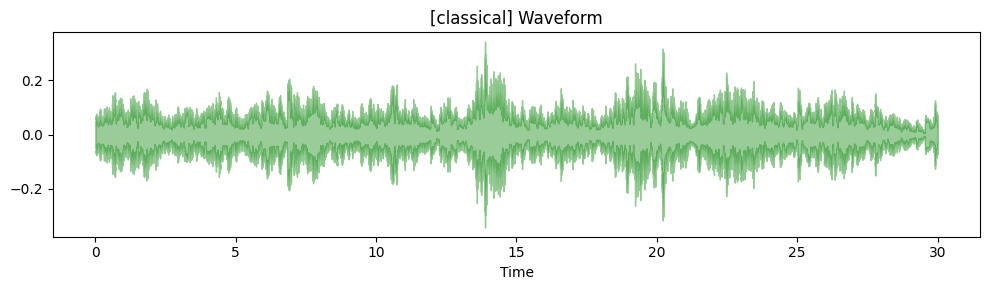

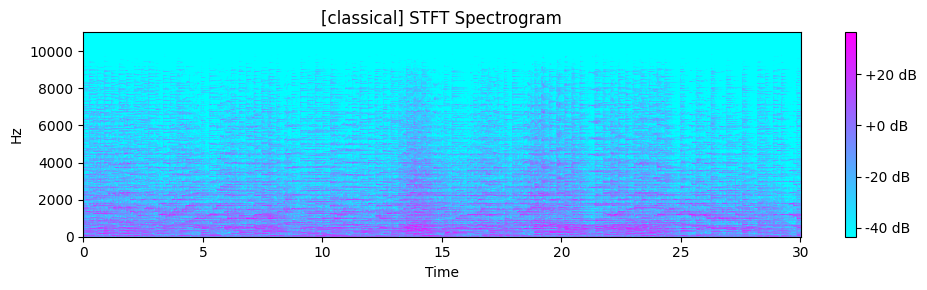

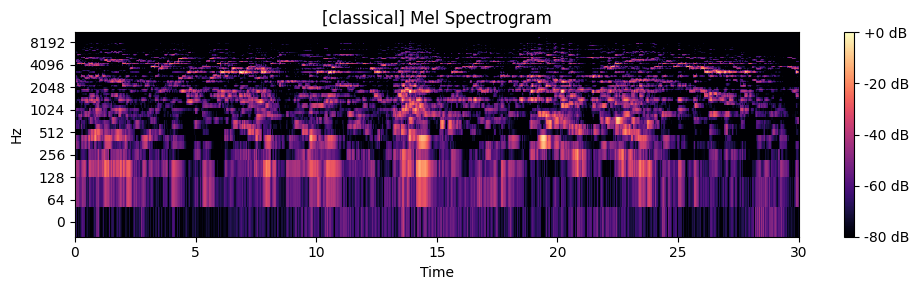


 Genre: COUNTRY
File: C:\Users\oscar\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\genres_original\country\country.00000.wav


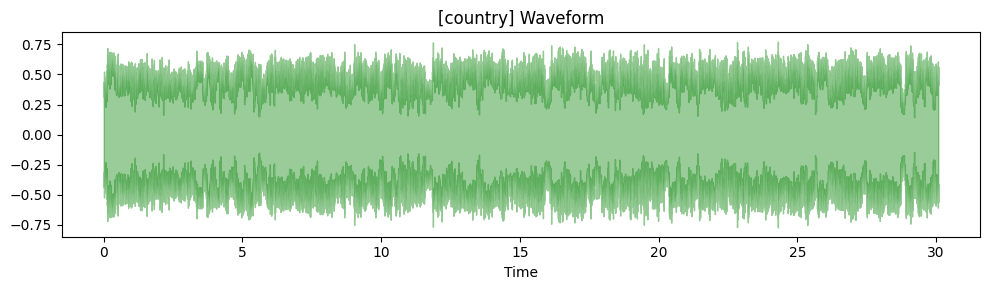

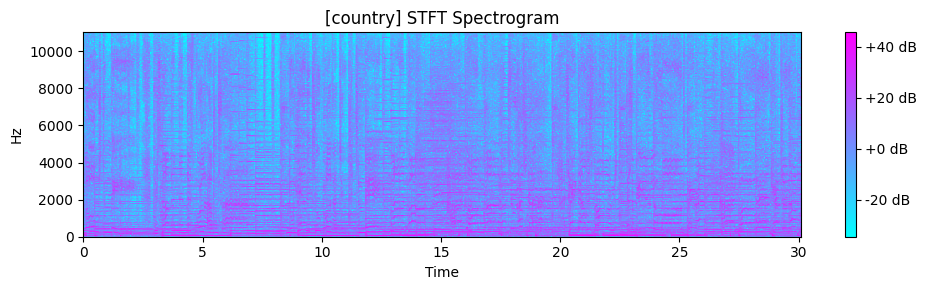

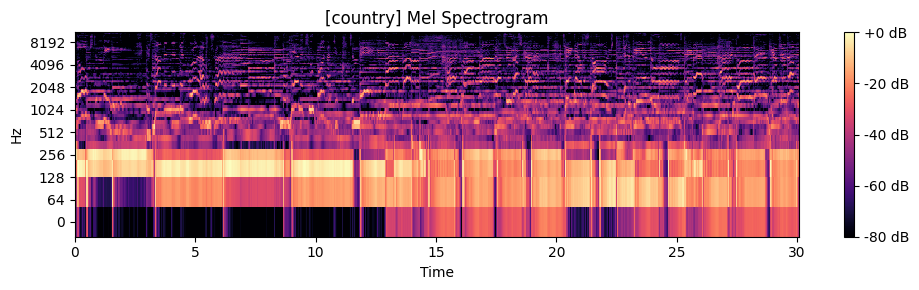


 Genre: DISCO
File: C:\Users\oscar\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\genres_original\disco\disco.00000.wav


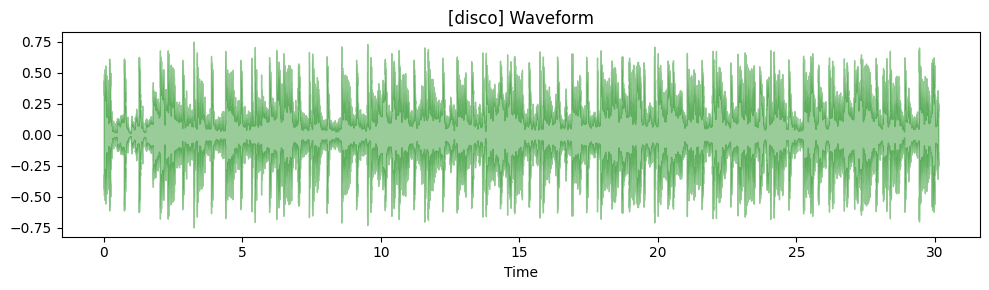

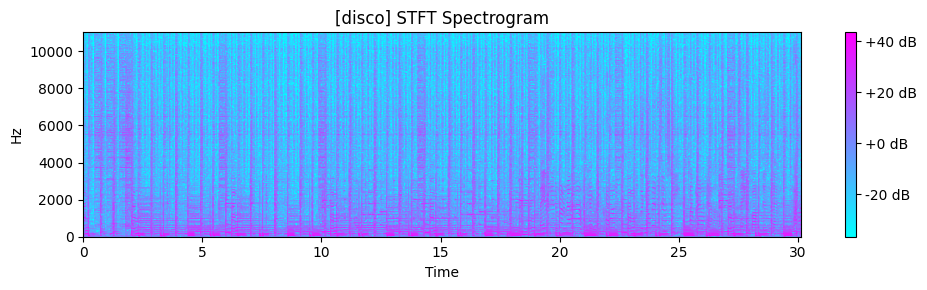

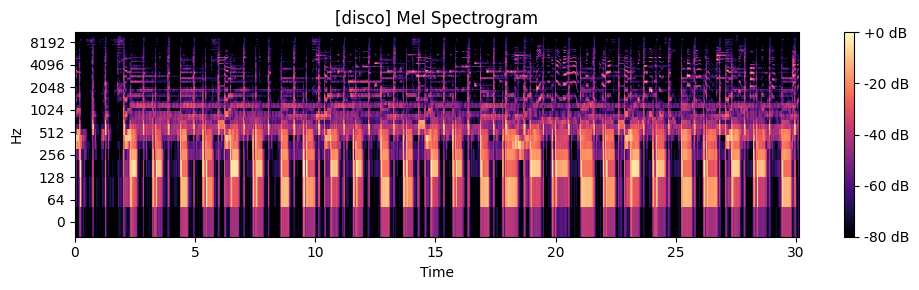


 Genre: HIPHOP
File: C:\Users\oscar\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\genres_original\hiphop\hiphop.00000.wav


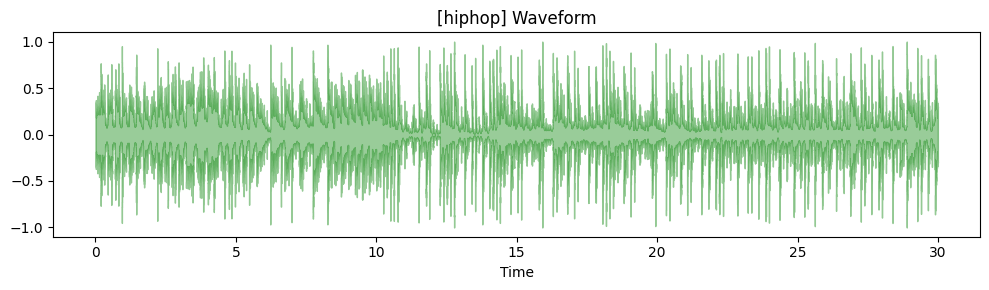

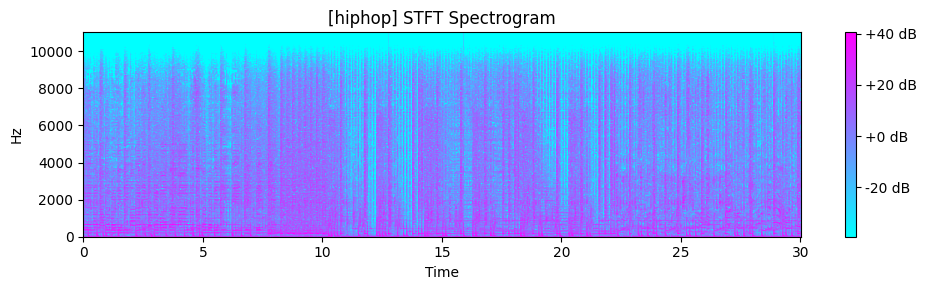

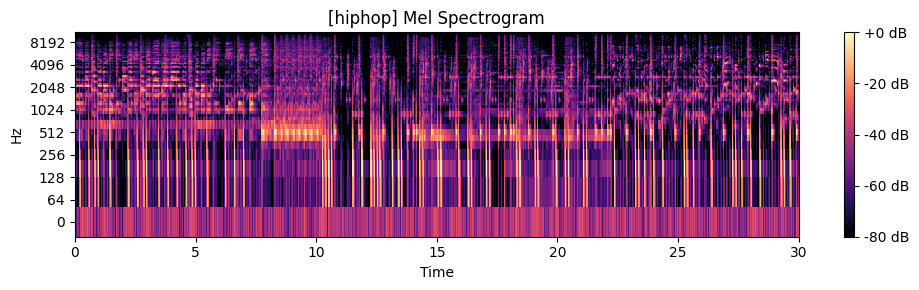


 Genre: JAZZ
File: C:\Users\oscar\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\genres_original\jazz\jazz.00000.wav


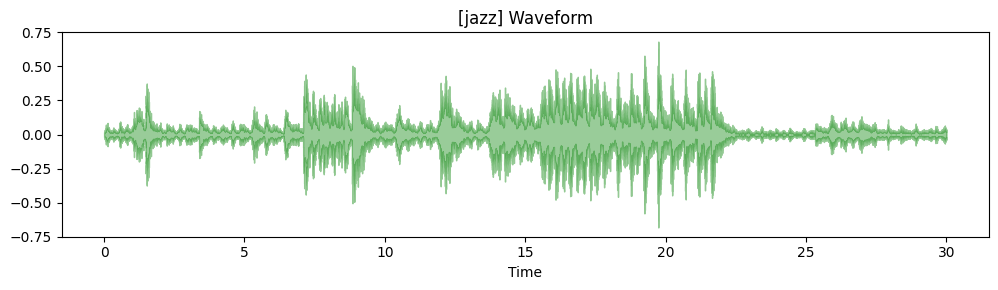

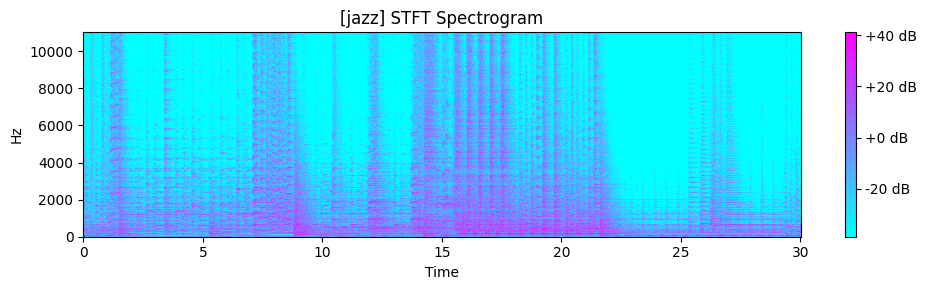

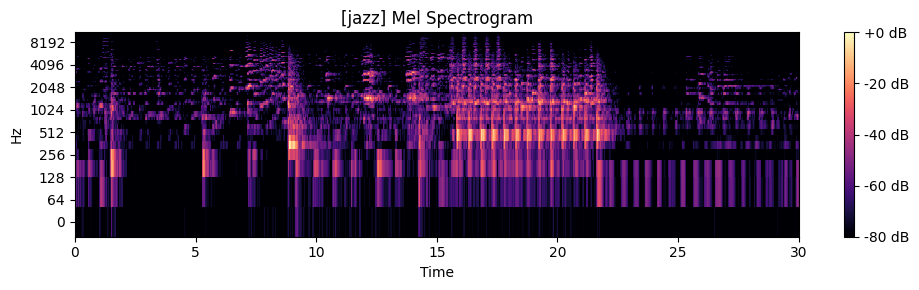


 Genre: METAL
File: C:\Users\oscar\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\genres_original\metal\metal.00000.wav


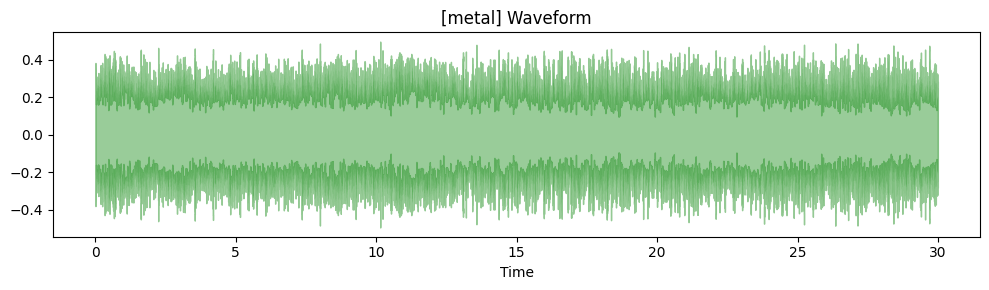

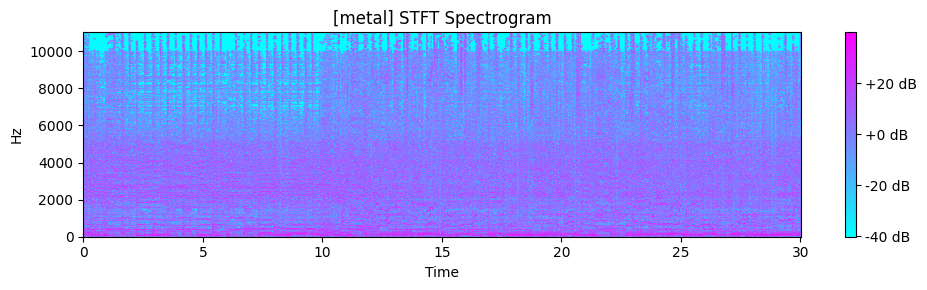

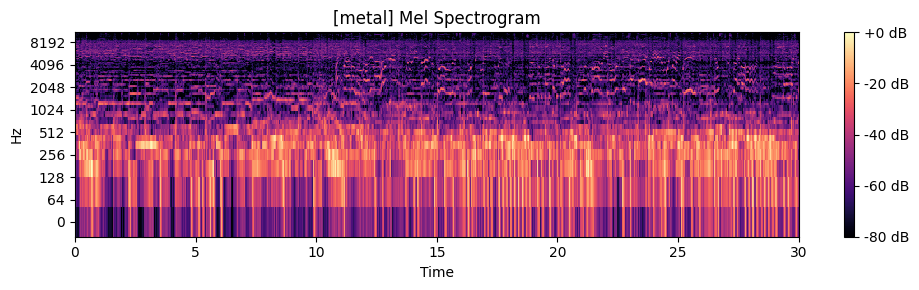


 Genre: POP
File: C:\Users\oscar\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\genres_original\pop\pop.00000.wav


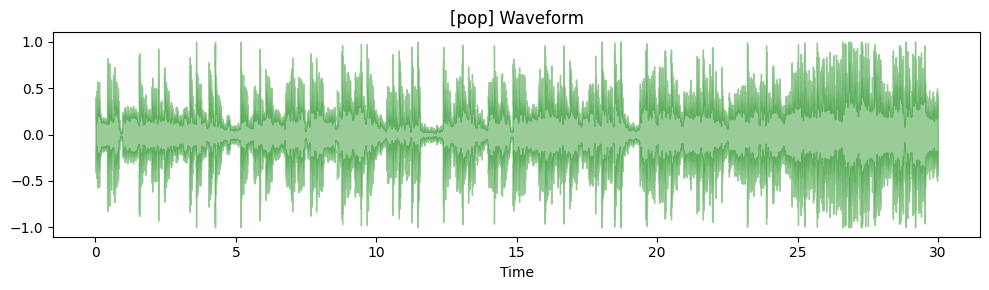

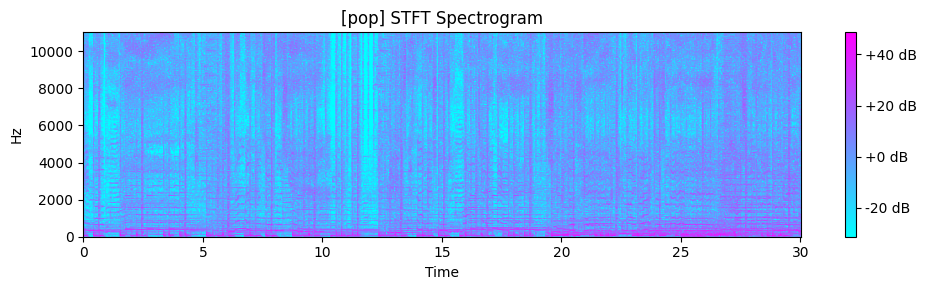

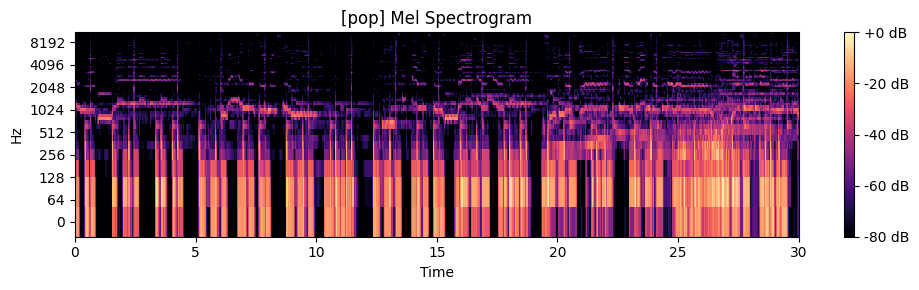


 Genre: REGGAE
File: C:\Users\oscar\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\genres_original\reggae\reggae.00000.wav


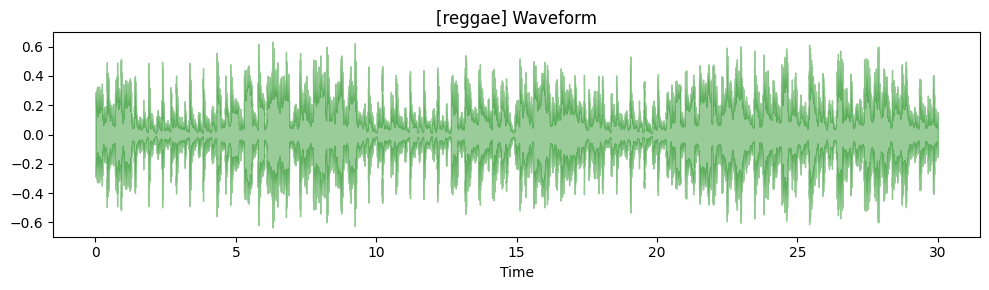

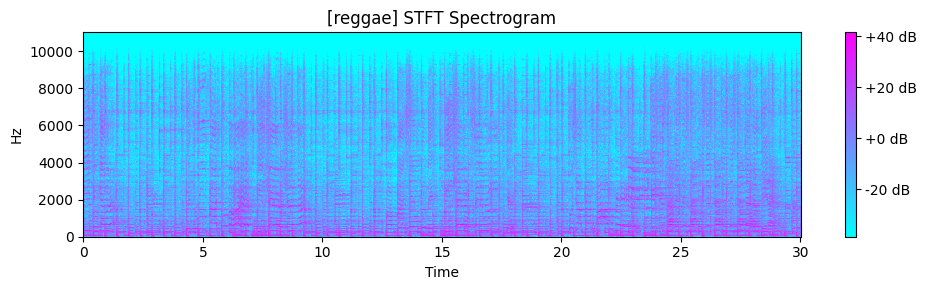

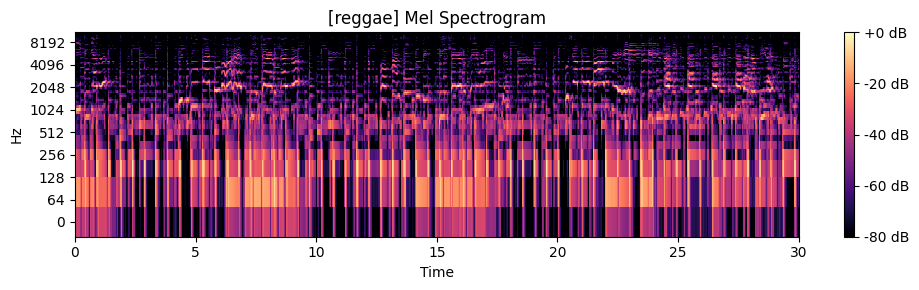


 Genre: ROCK
File: C:\Users\oscar\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\genres_original\rock\rock.00000.wav


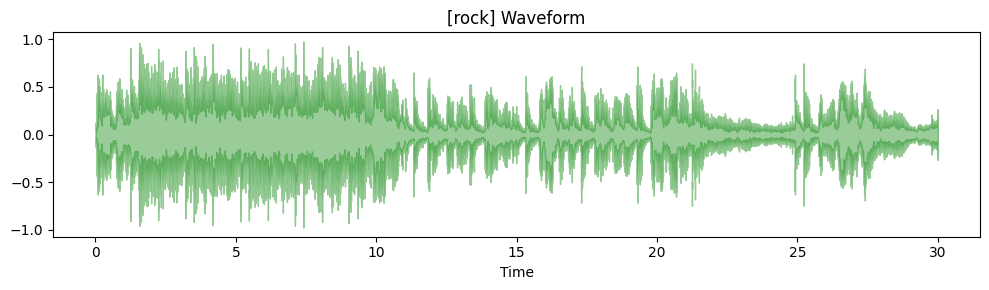

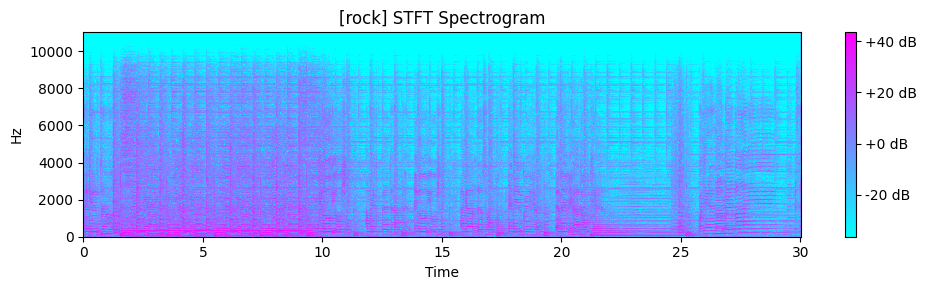

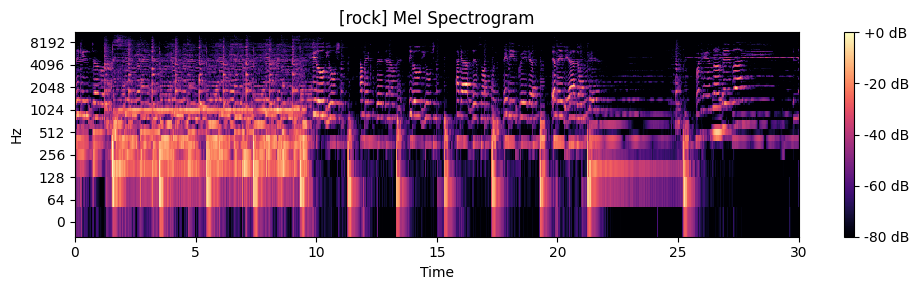

In [14]:
base_audio_dir = f"{path}\Data\genres_original"
first_files = get_first_audio_from_each_genre(base_audio_dir)
visualize_genre_grouped(first_files)

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

def extract_features(file_path):
    
    try:
        y, sr = librosa.load(file_path, sr=None)
        #y: the audio signal as a waveform
        #sr: the sampling rate
        #sr=None means it will use the native sampling rate of the file
    except Exception as e:
        print(f" Could not load {file_path}: {e}")
        return None   


    features = {
        "filename": os.path.basename(file_path),
        "length": len(y),
        "chroma_stft_mean": np.mean(cs := librosa.feature.chroma_stft(y=y, sr=sr)),
        "chroma_stft_var": np.var(cs),
        "rms_mean": np.mean(rms := librosa.feature.rms(y=y)),
        "rms_var": np.var(rms),
        "spectral_centroid_mean": np.mean(sc := librosa.feature.spectral_centroid(y=y, sr=sr)),
        "spectral_centroid_var": np.var(sc),
        "spectral_bandwidth_mean": np.mean(sb := librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        "spectral_bandwidth_var": np.var(sb),
        "rolloff_mean": np.mean(roll := librosa.feature.spectral_rolloff(y=y, sr=sr)),
        "rolloff_var": np.var(roll),
        "zero_crossing_rate_mean": np.mean(zcr := librosa.feature.zero_crossing_rate(y)),
        "zero_crossing_rate_var": np.var(zcr),
        "harmony_mean": np.mean(h := librosa.effects.harmonic(y)),
        "harmony_var": np.var(h),
        "perceptr_mean": np.mean(p := librosa.effects.percussive(y)),
        "perceptr_var": np.var(p),
        "tempo": librosa.beat.tempo(y=y, sr=sr)[0],
    }

    # MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for i in range(1, 21):
        features[f"mfcc{i}_mean"] = np.mean(mfcc[i - 1])
        features[f"mfcc{i}_var"] = np.var(mfcc[i - 1])

    return features

def process_dataset(base_dir):
    data = []
    genres = os.listdir(base_dir)

    for genre in tqdm(genres, desc="Processing genres"):
        genre_path = os.path.join(base_dir, genre)
        if not os.path.isdir(genre_path):
            continue
        for file in os.listdir(genre_path):
            if file.endswith(".wav"):
                file_path = os.path.join(genre_path, file)
                feats = extract_features(file_path)
                if feats is None:
                    continue
                feats["label"] = genre
                data.append(feats)

    return pd.DataFrame(data)

base_audio_dir = f"{path}\Data\genres_original"

df = process_dataset(base_audio_dir)
df.to_csv("gtzan_features.csv", index=False)
print("CSV: gtzan_features.csv")


Processing genres:   0%|          | 0/10 [00:00<?, ?it/s]C:\Users\oscar\AppData\Local\Temp\ipykernel_27304\4168714153.py:38: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  "tempo": librosa.beat.tempo(y=y, sr=sr)[0],
Processing genres:  50%|█████     | 5/10 [21:43<22:17, 267.47s/it]C:\Users\oscar\AppData\Local\Temp\ipykernel_27304\4168714153.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
c:\Users\oscar\anaconda3\envs\py310\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


 Could not load C:\Users\oscar\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\genres_original\jazz\jazz.00054.wav: 


Processing genres: 100%|██████████| 10/10 [42:44<00:00, 256.40s/it]

✅ CSV: gtzan_features.csv
